Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[George McNinch](http://gmcninch.math.tufts.edu) <george.mcninch@tufts.edu>  
*Fall 2020*

Course material: Finite-state machines - code for problem set 5
-------------------------------------------------------

Example: aging and population growth
------------------------------------

The nodes of the diagram will represent the age of an individual in a population.

The transitions corresponding to labels edges $s_i=(i \to i+1)$ represent probability of survival from age $i$ to age $i+1$. 

And the transitions $f_i:(i \to 0)$ represent probability of having an offspring at age $i$.

We suppose that $s_4 = 0$ -- i.e. the organisms modeled here have a life span of less than 5 time units.

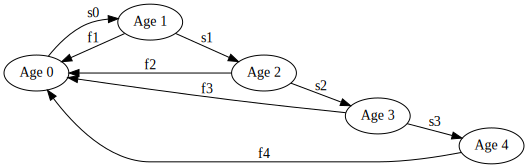

In [74]:
pop = Digraph("pop")
pop.attr(rankdir='LR')

p = list(range(5))
with pop.subgraph() as c:
#    c.attr(rank='same')
    for i in p:
        c.node(f"Age {i}")

for i in p:
    if i+1 in p:
        pop.edge(f"Age {i}",f"Age {i+1}",f"s{i}")
    if i != 0:
        pop.edge(f"Age {i}","Age 0",f"f{i}")
    
pop

The matrix of interest is:

$$A = \begin{bmatrix}
f_0 & f_1 & f_2 & f_3 & f_4 \\
s_0 & 0 & 0  & 0 & 0 \\
0 & s_1 & 0  & 0 & 0  \\
0 & 0 & s_2  & 0 & 0 \\
0 & 0 & 0  & s_3 & 0 \\
\end{bmatrix}.$$

If the vector $\mathbf{p}^{(t)} = \begin{bmatrix} p_0 & p_1 & p_2 & p_3 & p_4 \end{bmatrix}^T$
describes the population at a given time $t$, then for $j \ge 0$ the population
$j$ time units later is given by
$$\mathbf{p}^{(t+j)} = A^j \mathbf{p}^{(0)}$$


In [87]:
import numpy as np

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

def sbv(index,size):
    ## in this case, index should be in range(size) = [0,1,...,size-1].
    return np.array([1.0 if i == index else 0.0 for i in range(size)])

ones = np.ones(5)

def A(f,s):
    ## f and s should be lists each of length 5 with etnries between 0 and 1
    ## and s4 should be 0
    return np.array([np.array(f)]
                    +
                    [s[i]*sbv(i,5) for i in range(4)])
    
## for example,
## f1 = [.4,.25,.2,.15,0]
## s1 = [.4,.4,.4,.4,0]

## or 
## f1 = [.7,.6,.5,.25,0]
## s1 = [.6,.7,.5,1,0]

## You can compute powers of a square matrix as follows:
##
## A = A(f,s)
## np.linalg.matrix_power(A,5)

## And you can multiply the "all-ones" row vector ones by A using:
## ones @ A